## Raman spectroscopy to screen diabetes using ML tool

**Reference** 
<br>[1..all]  Guevara, E., Torres-Galván, J. C., Ramírez-Elías, M. G., Luevano-Contreras, C., & González, F. J. (2018). Use of Raman spectroscopy to screen diabetes mellitus with machine learning tools. Biomedical Optics Express, 9(10), 4998–5010. https://doi.org/10.1364/BOE.9.004998
<br><br>[2] Lippincott , W. &. W. (2006). Advanced Glycation End Products. Circulation. https://doi.org/10.1161/CIRCULATIONAHA.106.621854

### Scope and Topic understanding
- #### To indicate diabetes by using `Blood Biomarker` or `Analyte` called `advanced glycation end products` with `Raman spectroscopy`
    - In this dataset there are 6 Analyte including
        - 3-deoxyglucosone
        - glyoxal
        - glyoxal-lysine dimer GOLD
        - methylglyoxal
        - methylglyoxal-derived hydroimidazolone MG-H2
        - pentosidine
    <br><br>
    - what is these 6 compound ?**[2]**<br>
    <img src = 'https://www.ahajournals.org/cms/asset/838a5e28-bbae-46fd-8a56-7f87c632167c/13ff1.jpg'>
        - Advanced glycation end products (AGEs) are modifications of proteins or lipids that become nonenzymatically glycated and oxidized after contact with aldose sugars.1,2 Early glycation and oxidation processes result in the formation of Schiff bases and Amadori products. 
### Ideal
- Normally, Raman spec can **ethier** identify the compound or indicating the present of compound in solution **and** finding the concentration.
- Thus, the height,Intensity or Peak area  of the spectra at **exact** wavenumber ($cm^{-1}$) can tell both concentration and **bond** identification.

### Let begin with our 6 standard.
# 1. ETL (Extract-Transform-Load)

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
standard = pd.read_csv('dataset/AGEs.csv')

In [3]:
standard.head()

,AGEsID,Var802,Var803,Var804,Var805,Var806,Var807,Var808,Var809,Var810,...,Var1793,Var1794,Var1795,Var1796,Var1797,Var1798,Var1799,Var1800,Var1801,Var1802
0,ramanShift,800.000000,801.000000,802.000000,803.000000,804.000000,805.000000,806.000000,807.000000,808.000000,...,1791.000000,1792.000000,1793.000000,1794.000000,1795.000000,1796.000000,1797.000000,1798.000000,1799.000000,1800.000000
1,3-deoxyglucosone,0.001791,0.001813,0.001839,0.001868,0.001899,0.001929,0.001956,0.001980,0.002002,...,0.000492,0.000492,0.000495,0.000502,0.000509,0.000516,0.000524,0.000534,0.000543,0.000553
2,glyoxal,0.000220,0.000243,0.000270,0.000299,0.000331,0.000367,0.000405,0.000445,0.000488,...,0.000213,0.000217,0.000222,0.000227,0.000233,0.000240,0.000247,0.000253,0.000256,0.000256
3,GOLD,0.000302,0.000295,0.000288,0.000281,0.000275,0.000268,0.000262,0.000256,0.000251,...,0.000141,0.000142,0.000142,0.000129,0.000128,0.000128,0.000127,0.000127,0.000126,0.000126
4,methylglyoxal,0.003002,0.003058,0.003095,0.003115,0.003121,0.003115,0.003098,0.003072,0.003038,...,-0.000115,-0.000130,-0.000146,-0.000161,-0.000176,-0.000190,-0.000205,-0.000219,-0.000223,-0.000224


In [4]:
standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Columns: 1002 entries, AGEsID to Var1802
dtypes: float64(1001), object(1)
memory usage: 54.9+ KB


In [5]:
standard.describe()

,Var802,Var803,Var804,Var805,Var806,Var807,Var808,Var809,Var810,Var811,...,Var1793,Var1794,Var1795,Var1796,Var1797,Var1798,Var1799,Var1800,Var1801,Var1802
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,114.286622,114.429484,114.572344,114.715203,114.858060,115.000916,115.143771,115.286625,115.429478,115.572330,...,255.857262,256.000119,256.142978,256.285835,256.428694,256.571558,256.714419,256.857279,257.000141,257.142999
std,302.371178,302.749140,303.127104,303.505067,303.883032,304.260997,304.638962,305.016928,305.394895,305.772861,...,676.934319,677.312283,677.690247,678.068212,678.446175,678.824136,679.202099,679.580062,679.958025,680.335989
min,0.000220,0.000231,0.000226,0.000221,0.000215,0.000208,0.000202,0.000195,0.000187,0.000179,...,-0.000115,-0.000130,-0.000146,-0.000161,-0.000176,-0.000190,-0.000205,-0.000219,-0.000223,-0.000224
25%,0.000269,0.000269,0.000279,0.000290,0.000303,0.000318,0.000334,0.000340,0.000314,0.000289,...,0.000052,0.000058,0.000065,0.000072,0.000081,0.000107,0.000109,0.000109,0.000109,0.000109
50%,0.000803,0.000748,0.000693,0.000637,0.000582,0.000527,0.000475,0.000445,0.000488,0.000531,...,0.000141,0.000142,0.000142,0.000129,0.000128,0.000128,0.000144,0.000168,0.000194,0.000192
75%,0.002397,0.002436,0.002467,0.002492,0.002510,0.002522,0.002527,0.002526,0.002520,0.002511,...,0.000353,0.000355,0.000359,0.000365,0.000371,0.000378,0.000386,0.000394,0.000400,0.000405
max,800.000000,801.000000,802.000000,803.000000,804.000000,805.000000,806.000000,807.000000,808.000000,809.000000,...,1791.000000,1792.000000,1793.000000,1794.000000,1795.000000,1796.000000,1797.000000,1798.000000,1799.000000,1800.000000


In [6]:
standard.isna().values.any()

False

#### Now it time to load sample

In [7]:
samp_thumb = pd.read_csv('dataset/thumbNail.csv')
samp_thumb.head()

,patientID,has_DM2,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var3152,Var3153,Var3154,Var3155,Var3156,Var3157,Var3158,Var3159,Var3160,Var3161
0,ramanShift,NaN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159
1,DM201,1.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,...,0,0,0,0,0,0,0,0,0,0
2,DM202,1.0,116.4,116.4,116.4,116.4,116.4,116.4,116.4,116.4,...,0,0,0,0,0,0,0,0,0,0
3,DM203,1.0,104.8,104.8,104.8,104.8,104.8,104.8,104.8,104.8,...,0,0,0,0,0,0,0,0,0,0
4,DM204,1.0,72.6,72.6,72.6,72.6,72.6,72.6,72.6,72.6,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print(samp_thumb.info())
print()
print(samp_thumb.isna().values.sum())
# print(samp_thumb.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 3162 entries, patientID to Var3161
dtypes: float64(3002), int64(159), object(1)
memory usage: 518.9+ KB
None

1


In [9]:
samp_earl = pd.read_csv('dataset/earLobe.csv')
samp_earl.head()

,patientID,has_DM2,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var3152,Var3153,Var3154,Var3155,Var3156,Var3157,Var3158,Var3159,Var3160,Var3161
0,ramanShift,NaN,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,...,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159
1,DM201,1.0,181.800000,181.800000,181.800000,181.800000,181.800000,181.800000,181.800000,181.800000,...,0,0,0,0,0,0,0,0,0,0
2,DM202,1.0,162.800000,162.800000,162.800000,162.800000,162.800000,162.800000,162.800000,162.800000,...,0,0,0,0,0,0,0,0,0,0
3,DM203,1.0,107.400000,107.400000,107.400000,107.400000,107.400000,107.400000,107.400000,107.400000,...,0,0,0,0,0,0,0,0,0,0
4,DM204,1.0,290.166667,290.166667,290.166667,290.166667,290.166667,290.166667,290.166667,290.166667,...,0,0,0,0,0,0,0,0,0,0


In [10]:
print(samp_earl.info())
print()
print(samp_earl.isna().values.sum())
# print(samp_earl.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 3162 entries, patientID to Var3161
dtypes: float64(3002), int64(159), object(1)
memory usage: 518.9+ KB
None

1


In [11]:
samp_inarm = pd.read_csv('dataset/innerArm.csv')
samp_inarm.head()

,patientID,has_DM2,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var3152,Var3153,Var3154,Var3155,Var3156,Var3157,Var3158,Var3159,Var3160,Var3161
0,ramanShift,NaN,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,...,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159
1,DM201,1.0,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,...,0,0,0,0,0,0,0,0,0,0
2,DM202,1.0,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,214.800000,...,0,0,0,0,0,0,0,0,0,0
3,DM203,1.0,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,457.800000,...,0,0,0,0,0,0,0,0,0,0
4,DM204,1.0,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,181.833333,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print(samp_inarm.info())
print()
print(samp_inarm.isna().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 3162 entries, patientID to Var3161
dtypes: float64(3002), int64(159), object(1)
memory usage: 518.9+ KB
None

1


In [13]:
samp_vein = pd.read_csv('dataset/vein.csv')
samp_vein.head()

,patientID,has_DM2,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var3152,Var3153,Var3154,Var3155,Var3156,Var3157,Var3158,Var3159,Var3160,Var3161
0,ramanShift,NaN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159
1,DM201,1.0,181.8,181.8,181.8,181.8,181.8,181.8,181.8,181.8,...,0,0,0,0,0,0,0,0,0,0
2,DM202,1.0,246.2,246.2,246.2,246.2,246.2,246.2,246.2,246.2,...,0,0,0,0,0,0,0,0,0,0
3,DM203,1.0,164.6,164.6,164.6,164.6,164.6,164.6,164.6,164.6,...,0,0,0,0,0,0,0,0,0,0
4,DM204,1.0,293.8,293.8,293.8,293.8,293.8,293.8,293.8,293.8,...,0,0,0,0,0,0,0,0,0,0


In [14]:
print(samp_vein.info())
print()
print(samp_vein.isna().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 3162 entries, patientID to Var3161
dtypes: float64(3002), int64(159), object(1)
memory usage: 518.9+ KB
None

1


## CONCLUSION ETL
- ### standard solution 
    - group of all interest analyte that can be select for interest area.
    - no NaN value here.
- ### sample
    - TODO

# 2 . EDA
> SELECT interest range

- ### hypothesis
    - Since same compound will have peak at same wavenumber($cm^{-1}$) but different size, we can just select **several of small range** of wavenumber for fitting the model.
    

#### to plot the spectra we needed to transpose the df first
#### COMpare with sample data `I will randomly use some from thumb nail`

In [15]:
std_transpose = standard.set_index('AGEsID').transpose()
std_transpose.head()

AGEsID,ramanShift,3-deoxyglucosone,glyoxal,GOLD,methylglyoxal,MG-H2,pentosidine
Var802,800.0,0.001791,0.000220,0.000302,0.003002,0.000236,0.000803
Var803,801.0,0.001813,0.000243,0.000295,0.003058,0.000231,0.000748
Var804,802.0,0.001839,0.000270,0.000288,0.003095,0.000226,0.000693
Var805,803.0,0.001868,0.000299,0.000281,0.003115,0.000221,0.000637
Var806,804.0,0.001899,0.000331,0.000275,0.003121,0.000215,0.000582


In [16]:
samp_thumb_T = samp_thumb.set_index('patientID').transpose()

samp_thumb_T = samp_thumb_T.dropna() # just for plot thing we don need y values yet


sample_shift = samp_thumb_T['ramanShift']

samp_thumb_T.head()

patientID,ramanShift,DM201,DM202,DM203,DM204,DM205,DM206,DM207,DM208,DM209,...,DM211,Ctrl01,Ctrl02,Ctrl03,Ctrl04,Ctrl05,Ctrl06,Ctrl07,Ctrl08,Ctrl09
Var2,0.0,170.0,116.4,104.8,72.6,90.2,34.4,72.0,49.0,73.2,...,111.6,179.0,106.4,99.0,73.2,6.6,89.4,96.5,145.2,143.6
Var3,1.0,170.0,116.4,104.8,72.6,90.2,34.4,72.0,49.0,73.2,...,111.6,179.0,106.4,99.0,73.2,6.6,89.4,96.5,145.2,143.6
Var4,2.0,170.0,116.4,104.8,72.6,90.2,34.4,72.0,49.0,73.2,...,111.6,179.0,106.4,99.0,73.2,6.6,89.4,96.5,145.2,143.6
Var5,3.0,170.0,116.4,104.8,72.6,90.2,34.4,72.0,49.0,73.2,...,111.6,179.0,106.4,99.0,73.2,6.6,89.4,96.5,145.2,143.6
Var6,4.0,170.0,116.4,104.8,72.6,90.2,34.4,72.0,49.0,73.2,...,111.6,179.0,106.4,99.0,73.2,6.6,89.4,96.5,145.2,143.6


In [17]:
corr = std_transpose.columns
for c in corr:
    print(c)

ramanShift
3-deoxyglucosone
glyoxal
GOLD
methylglyoxal
MG-H2
pentosidine


In [18]:
shift = std_transpose['ramanShift']

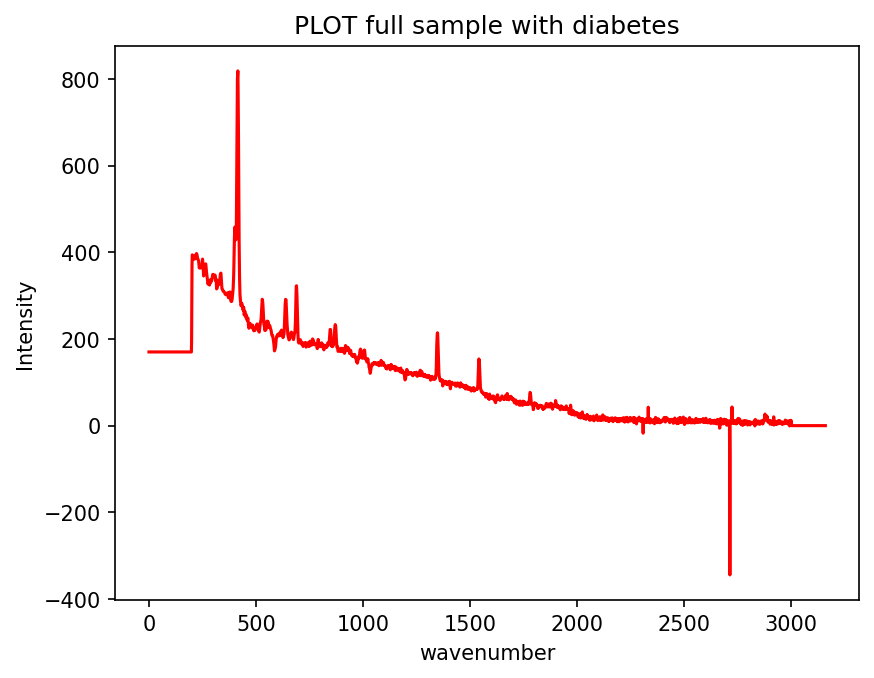

In [19]:
plt.figure(dpi=150)
plt.plot(sample_shift,samp_thumb_T['DM201'],c='red')
plt.title('PLOT full sample with diabetes')
plt.xlabel('wavenumber')
plt.ylabel('Intensity')
# plt.xlim((800, 1800))
plt.show()

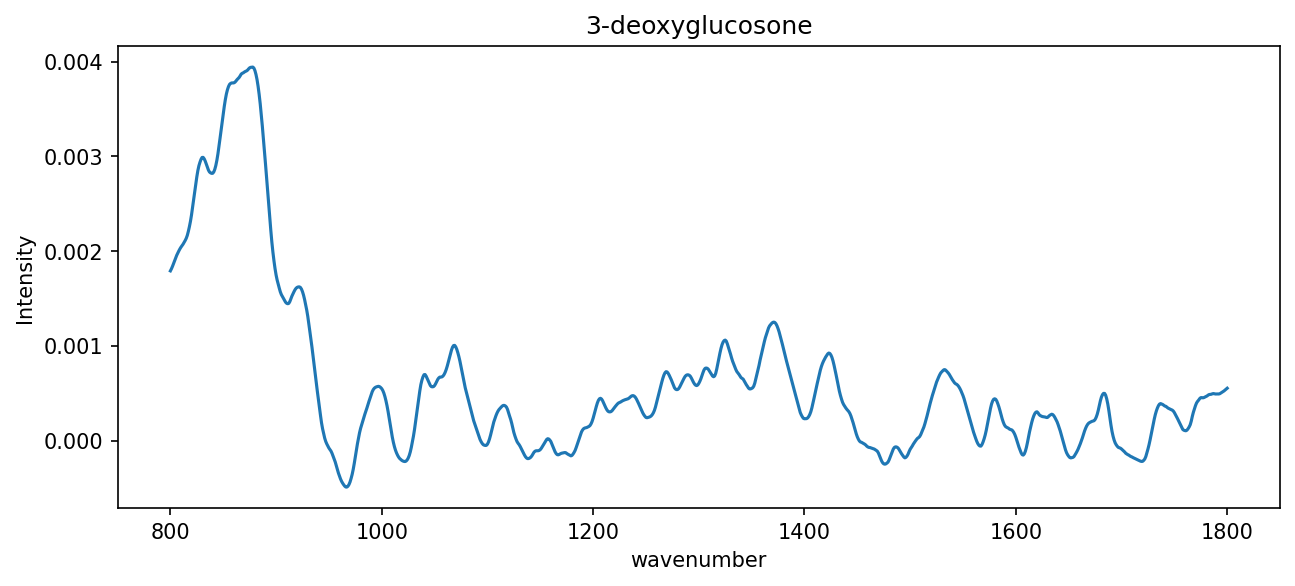

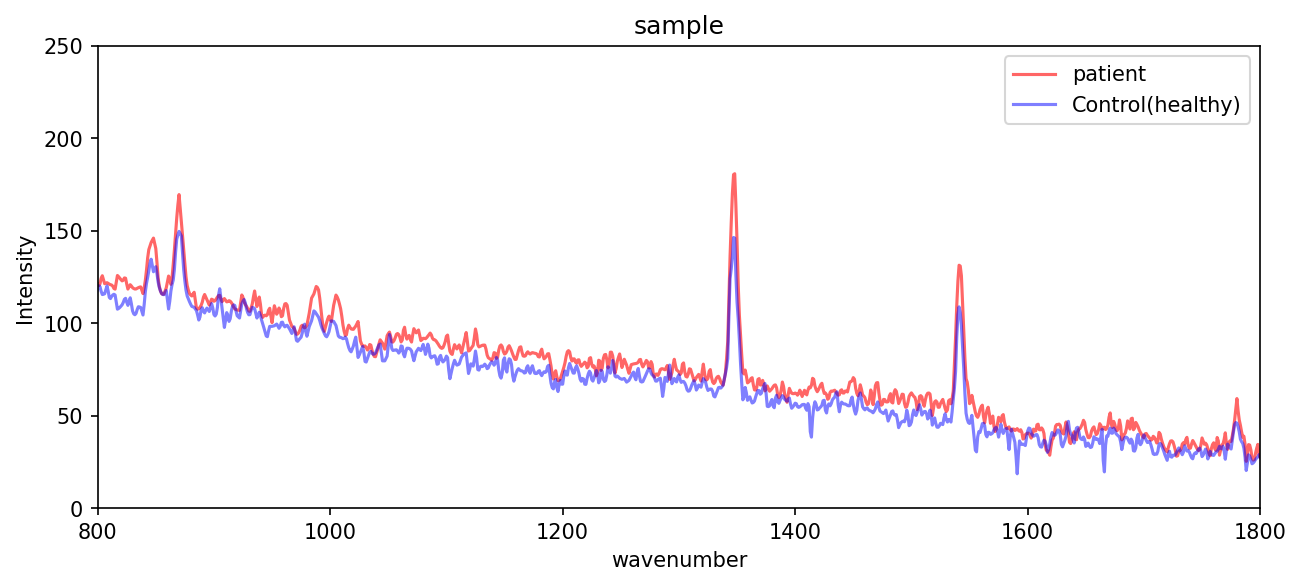

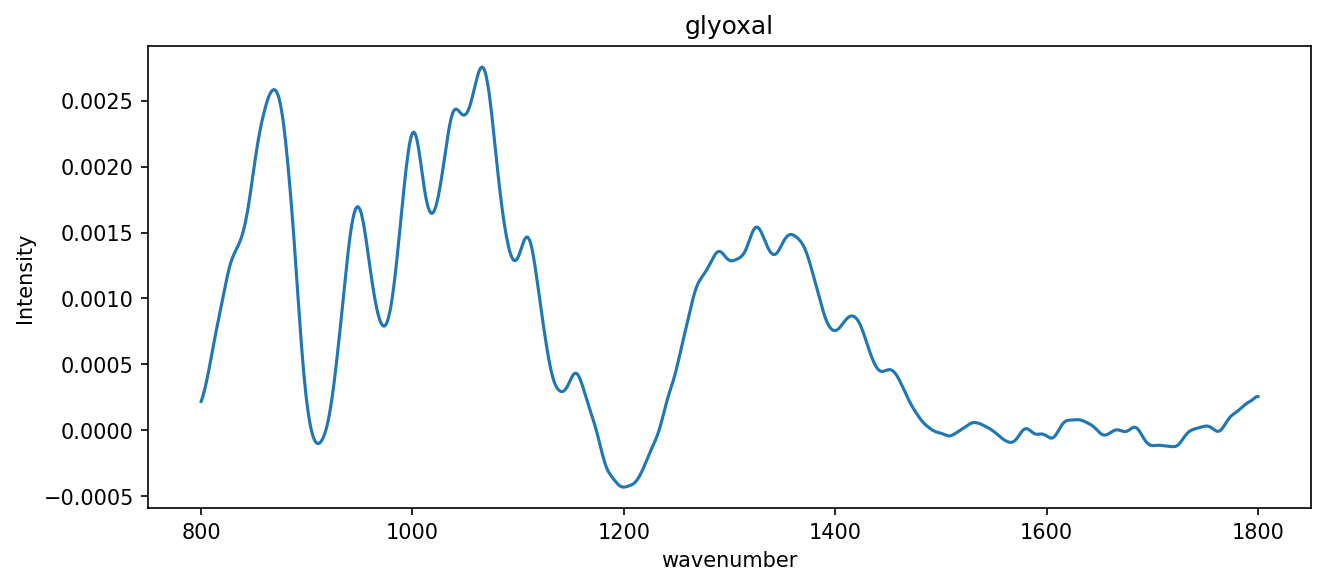

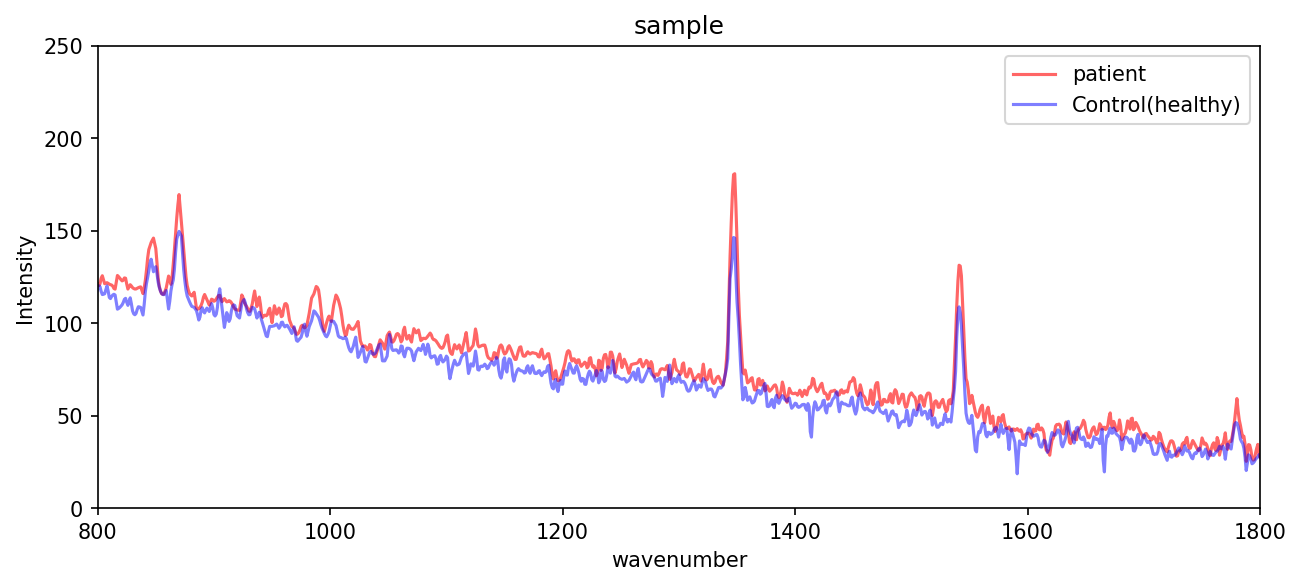

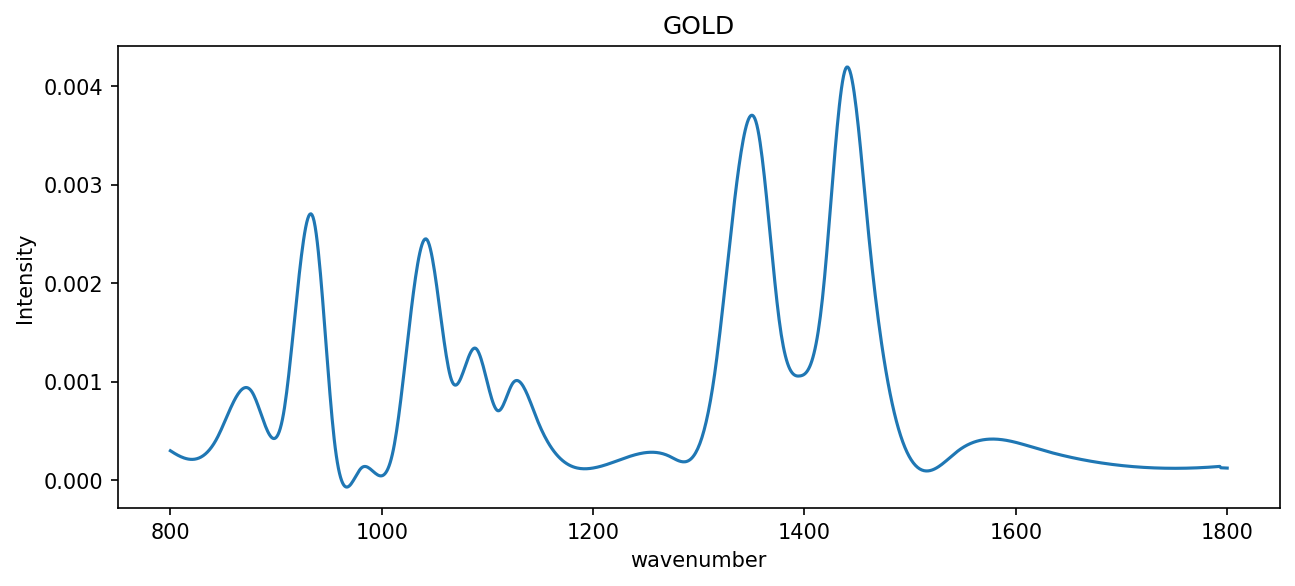

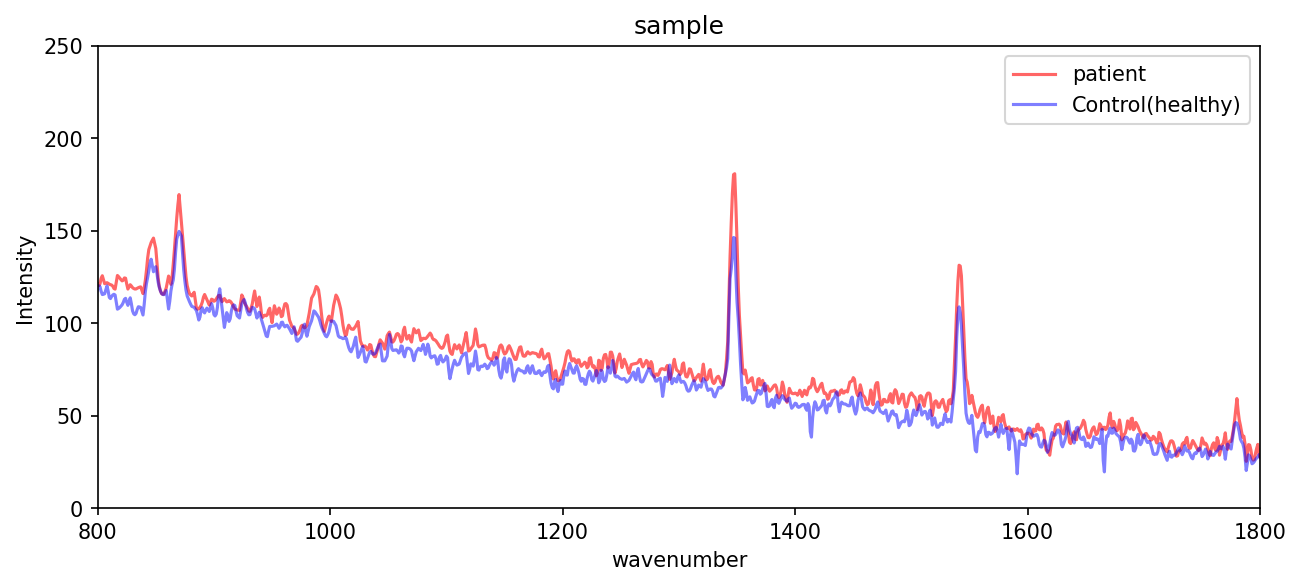

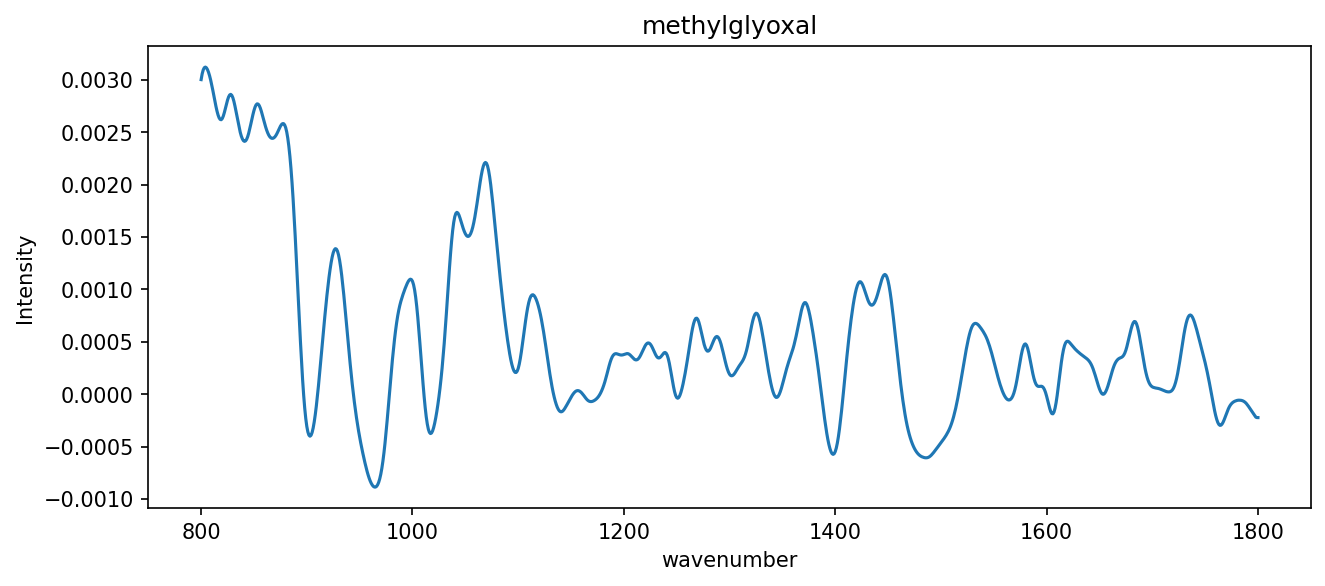

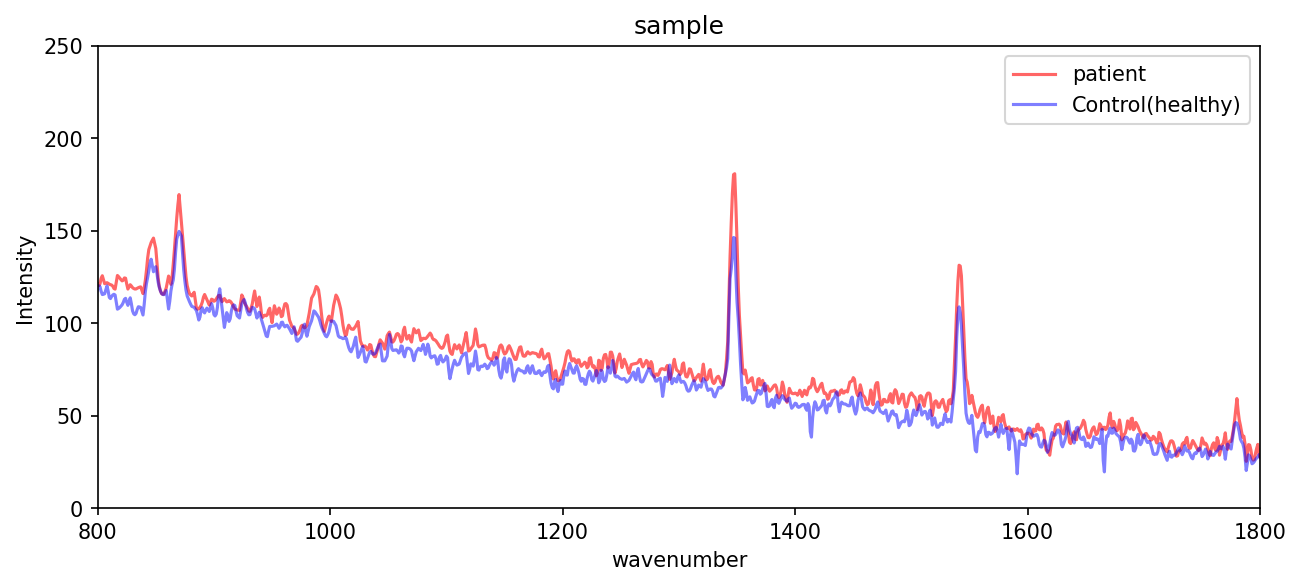

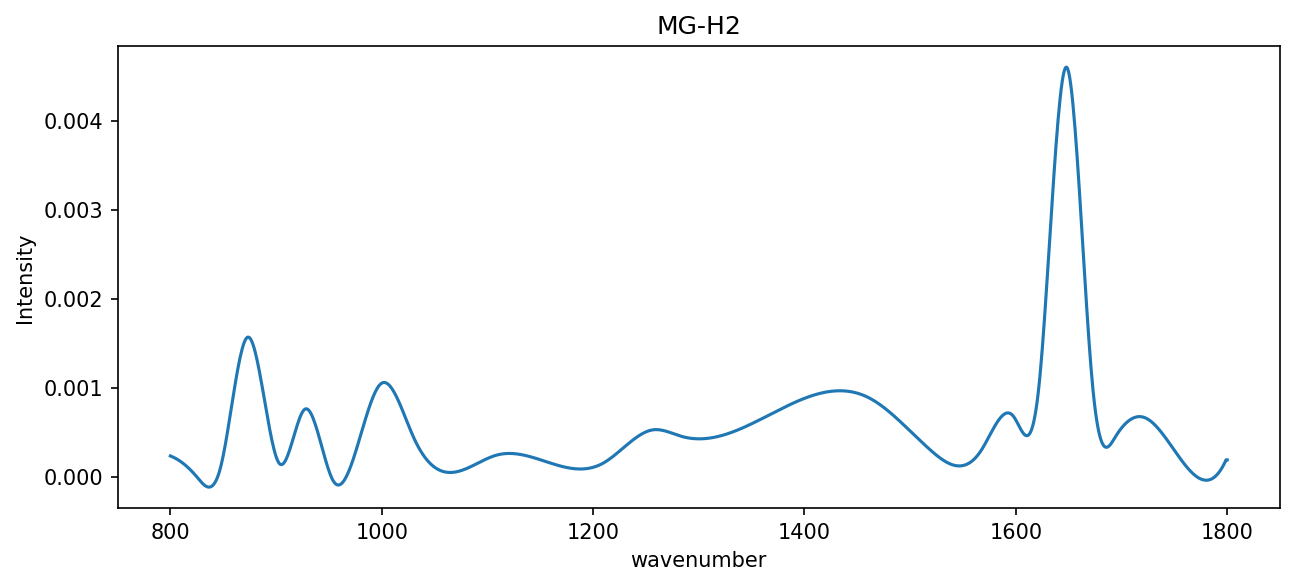

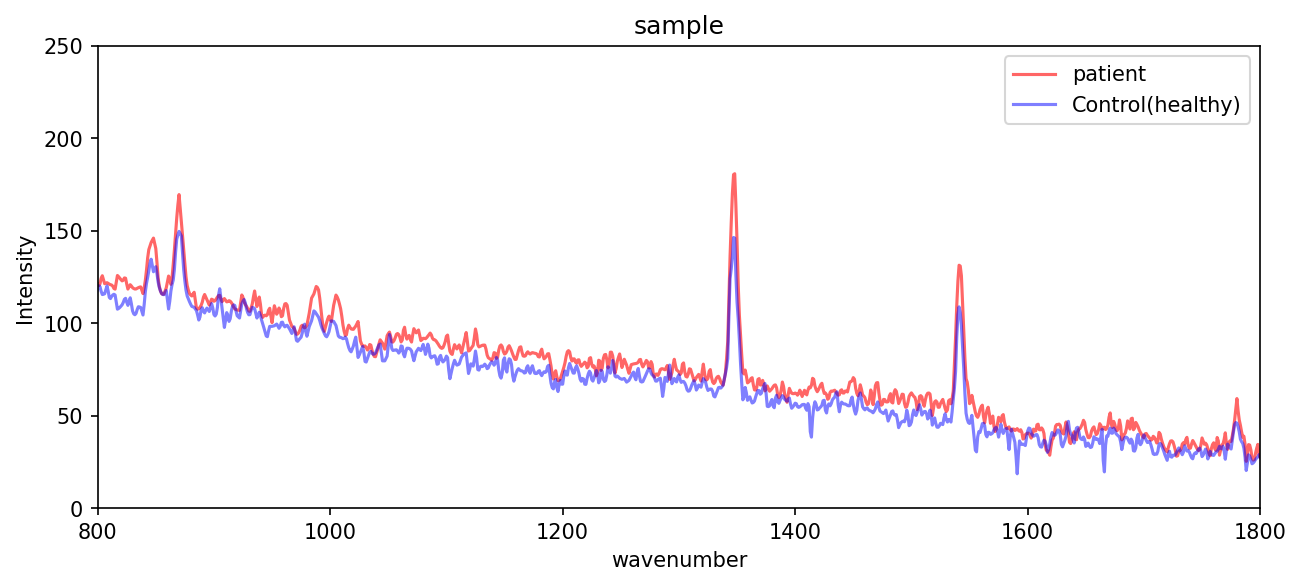

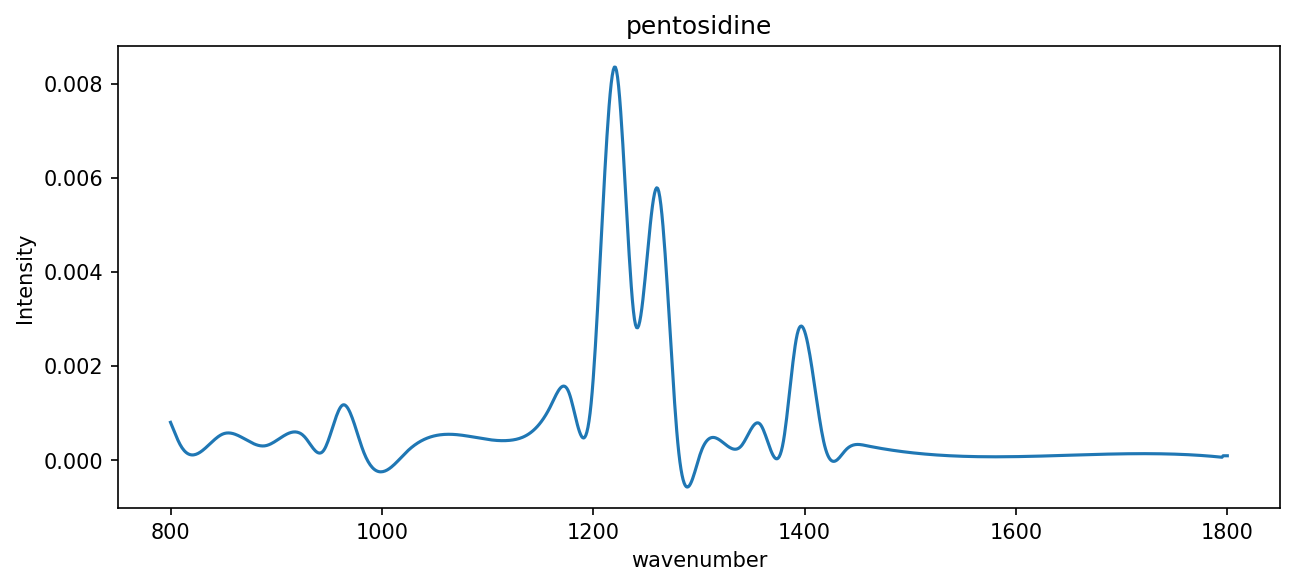

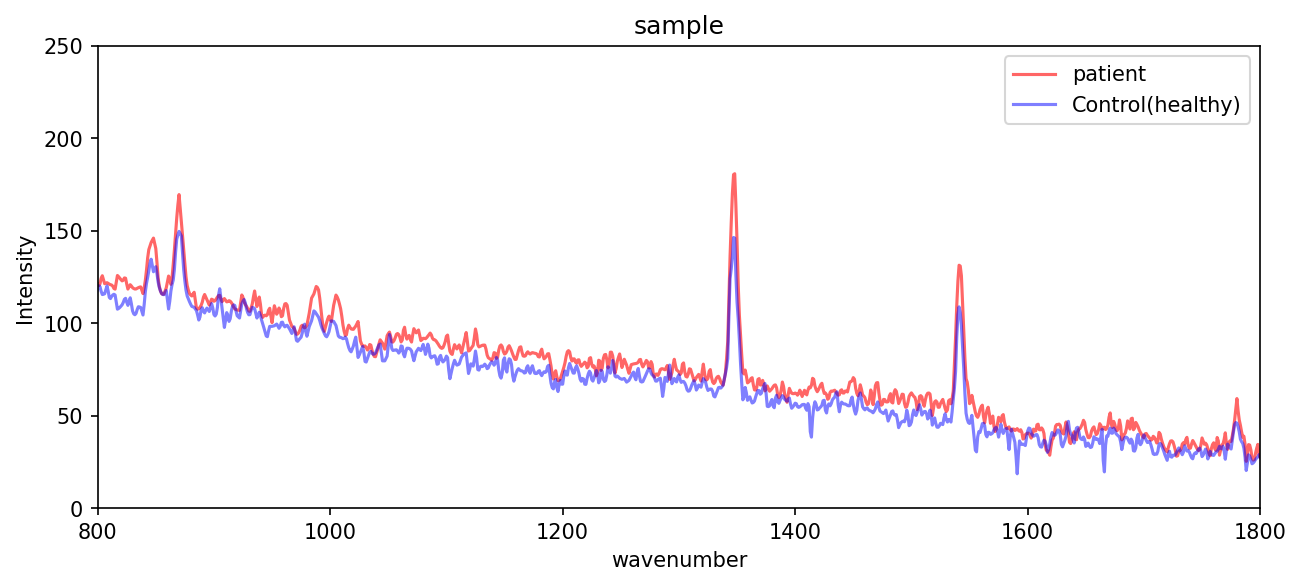

In [20]:
for c in corr:
    if c != 'ramanShift':
        plt.figure(dpi=150,figsize=(10,4))
        plt.plot(shift,std_transpose[c])
        plt.title(c)
        plt.xlabel('wavenumber')
        plt.ylabel('Intensity')
        plt.show()

        plt.figure(dpi=150,figsize=(10,4))
        plt.plot(sample_shift,samp_thumb_T['DM203'],c='red',label='patient',alpha=.6)
        plt.plot(sample_shift,samp_thumb_T['Ctrl03'],c='blue',label='Control(healthy)',alpha=.5)
        plt.title('sample')
        plt.xlabel('wavenumber')
        plt.ylabel('Intensity')
        plt.xlim((800, 1800))
        plt.ylim((0,250))
        plt.legend()
        plt.show()

## TODO select wavenumber, use average, else
<br>

## brfore

<br>

### One problem on the sample spectrogram (signal)

In [21]:
samp_thumb_T_col = samp_thumb_T.columns
patient_cor = samp_thumb_T_col[1:12]
control_cor = samp_thumb_T_col[12:]

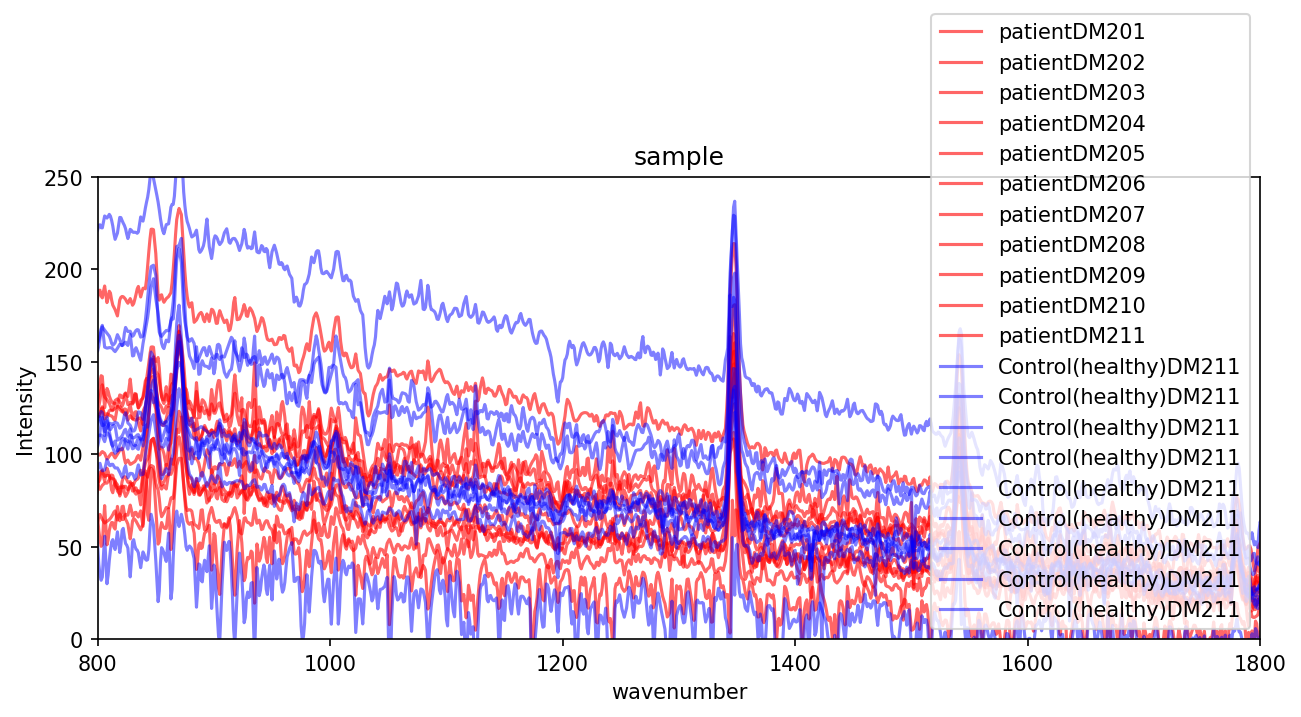

In [22]:
plt.figure(dpi=150,figsize=(10,4))
for d in patient_cor:
    # if c != 'ramanShift':
    plt.plot(sample_shift,samp_thumb_T[d],c = 'red',label='patient'+d,alpha=.6)
for c in control_cor:
    plt.plot(sample_shift,samp_thumb_T[c],c='blue',label='Control(healthy)'+d,alpha=.5)

plt.title('sample')
plt.xlabel('wavenumber')
plt.ylabel('Intensity')
plt.xlim((800, 1800))
plt.ylim((0,250))
plt.legend()
plt.show()

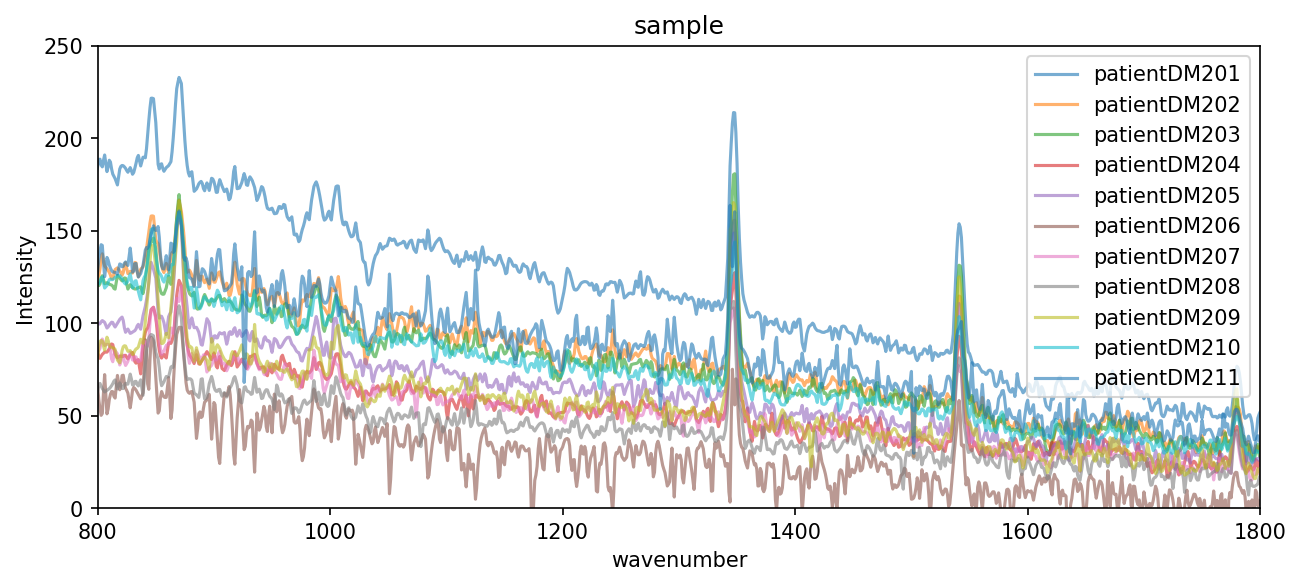

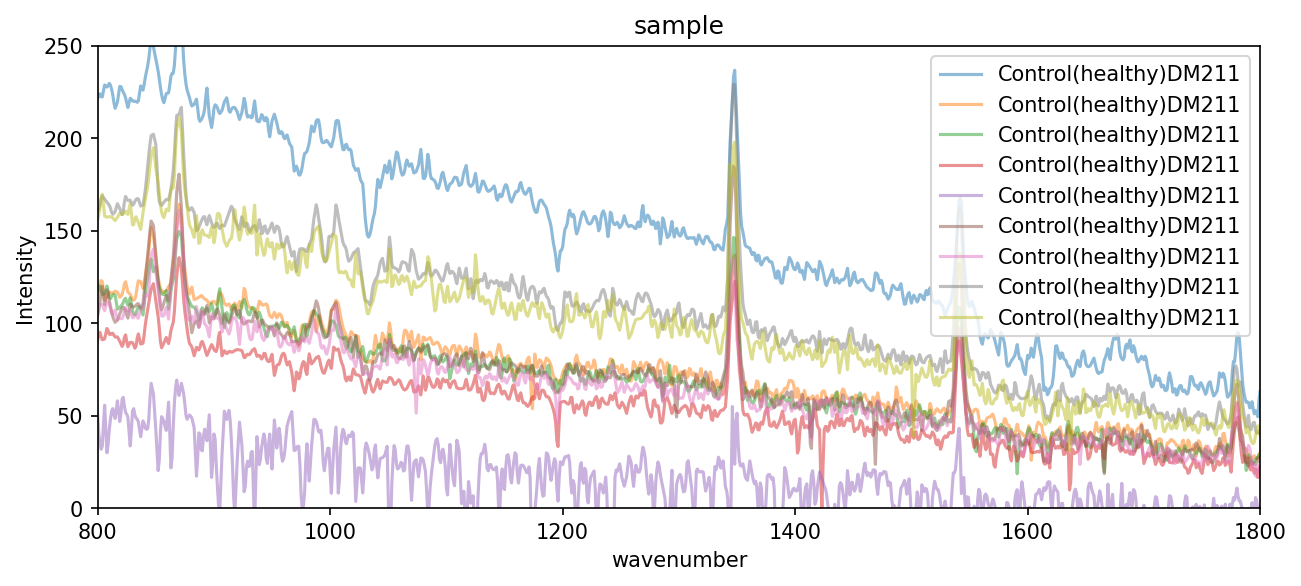

In [23]:
plt.figure(dpi=150,figsize=(10,4))
for d in patient_cor:
    # if c != 'ramanShift':
    plt.plot(sample_shift,samp_thumb_T[d],label='patient'+d,alpha=.6)
plt.title('sample')
plt.xlabel('wavenumber')
plt.ylabel('Intensity')
plt.xlim((800, 1800))
plt.ylim((0,250))
plt.legend()
plt.show()

plt.figure(dpi=150,figsize=(10,4))

for c in control_cor:
    plt.plot(sample_shift,samp_thumb_T[c],label='Control(healthy)'+d,alpha=.5)

plt.title('sample')
plt.xlabel('wavenumber')
plt.ylabel('Intensity')
plt.xlim((800, 1800))
plt.ylim((0,250))
plt.legend()
plt.show()

### Prelim conclusion
- Since signal baseline is **not** identical or similar to each other, `Algorithm` to fix these problem is need
### EDA Conclusion 
- for each analyte
    - 3-deoxyglucosone -> did not have any interest characteristic
    - glyoxal -> sharing quite the same characteristic with GOLD
    - glyoxal-lysine dimer GOLD -> nice
    - methylglyoxal
    - methylglyoxal-derived hydroimidazolone MG-H2
    - pentosidine

<!-- ##  TO FIX
- If we go with Deeplearning, we can use `Covolutional` and `MaxPooling` to reduce and select wavenumber(feature) for us.
- We also can use manual select where  -->

## Data Prepared to train and test

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc = StandardScaler()

> data accquire by 20 people and each person get test at 4 different area[1]

- furthur picture how there gather data are [here](https://doi.org/10.1364/BOE.9.004998)

<img src = 'https://opg.optica.org/getImage.cfm?img=QC5sYXJnZSxib2UtOS0xMC00OTk4LWcwMDE'>

In [160]:
alldataf = [samp_earl,samp_inarm,samp_thumb,samp_vein]

In [161]:
Xs = []
ys = []
for each_df in alldataf:
    # print(each_df.head())
    n = each_df[1:].to_numpy()
    m = n[:,2:].astype(float)
    X = m[:,800:1800]
    Xs.append(X)
    y = each_df.has_DM2.to_numpy()[1:]
    ys.append(y)
    

In [162]:
len(Xs),len(ys),len(X),len(y)

(4, 4, 20, 20)

In [163]:
seed_rand = 112
X_train0, X_test0, y_train0, y_test0 = train_test_split( Xs[0], ys[0], test_size=0.2, random_state=seed_rand)
X_train1, X_test1, y_train1, y_test1 = train_test_split( Xs[1], ys[1], test_size=0.2, random_state=seed_rand)
X_train2, X_test2, y_train2, y_test2 = train_test_split( Xs[2], ys[2], test_size=0.2, random_state=seed_rand)
X_train3, X_test3, y_train3, y_test3 = train_test_split( Xs[3], ys[3], test_size=0.2, random_state=seed_rand)

In [164]:
X_train_all = np.concatenate((X_train0,X_train1,X_train2,X_train3),axis=0)
y_train_all = np.concatenate((y_train0,y_train1,y_train2,y_train3),axis=0)
X_train_all.shape,y_train_all.shape

((64, 1000), (64,))

### Sent train data to torch

In [165]:
import torch

In [166]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [167]:
from torch.utils.data import TensorDataset

In [168]:
ds = TensorDataset(torch.FloatTensor(X_train_all),torch.LongTensor(y_train_all))

train_set, val_set = torch.utils.data.random_split(ds, [50, 14])

In [169]:
batch_size = 5

In [170]:
train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_set, 
                                           batch_size=4, 
                                           shuffle=True)

In [171]:
import torch, torchvision
from torchvision import transforms
from torch import nn
import numpy as np
import sys

## Modeling

In [172]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()  #super(Model, self)
        self.fc1 = nn.Linear(input_size, hidden_size) 
        #add non-linearity; recall ReLU is max(input, 0) 
        self.snm = nn.Softmax(dim=1)
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.snm(out)
        out = self.fc2(out)
        return out

In [173]:
model = NeuralNet(1000, 14, 2).to(device)

In [174]:
model

NeuralNet(
  (fc1): Linear(in_features=1000, out_features=14, bias=True)
  (snm): Softmax(dim=1)
  (fc2): Linear(in_features=14, out_features=2, bias=True)
)

In [175]:
criterion = nn.CrossEntropyLoss()   
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  

## Train

In [178]:
total_step = len(train_loader)  #for printing purpose
num_epochs = 700
for epoch in range(num_epochs):
    for i, (spec, y) in enumerate(train_loader):  
        
        #images shape is [100, 1, 28, 28] [batch_size, channel, height, width]
        
        # Move tensors to the configured device
        # also reshape to [100, 784] so it can be inputted into the Dense layer
        # images = images.reshape(-1, 28*28).to(device)
        spec = spec.to(device)
        y = y.to(device)
                
        # Forward pass
        outputs = model(spec)
        loss = criterion(outputs, y)  #note that outputs shape [batch, num_classes]) while labels shape ([batch, ])
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2 == 0:
            sys.stdout.write('\rEpoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    if (epoch) % 50 == 0:
        with torch.no_grad():
            total_val_corr = 0
            for (val_spec, val_label) in val_loader:
                val_spec = val_spec.to(device)
                val_label = val_label.to(device)
                val_yhat = model(val_spec)
                val_loss = criterion(val_yhat, val_label)

                val_predicted = torch.max(val_yhat, 1)[1]
                total_val_corr += (val_predicted == val_label).sum()
            val_acc = (total_val_corr * 100) / len(val_set)
            print(f"++++++Validation++++++  Loss: {val_loss:.2f} - Acc: {val_acc:.2f}",end = '\n')

Epoch [1/700], Step [10/10], Loss: 0.6766++++++Validation++++++  Loss: 0.70 - Acc: 28.57
Epoch [51/700], Step [10/10], Loss: 0.6765++++++Validation++++++  Loss: 0.82 - Acc: 28.57
Epoch [101/700], Step [10/10], Loss: 0.5821++++++Validation++++++  Loss: 0.70 - Acc: 28.57
Epoch [151/700], Step [10/10], Loss: 0.6764++++++Validation++++++  Loss: 0.82 - Acc: 28.57
Epoch [201/700], Step [10/10], Loss: 0.7240++++++Validation++++++  Loss: 0.70 - Acc: 28.57
Epoch [251/700], Step [10/10], Loss: 0.7242++++++Validation++++++  Loss: 0.82 - Acc: 28.57
Epoch [301/700], Step [10/10], Loss: 0.5806++++++Validation++++++  Loss: 0.82 - Acc: 28.57
Epoch [351/700], Step [10/10], Loss: 0.7243++++++Validation++++++  Loss: 0.58 - Acc: 28.57
Epoch [401/700], Step [10/10], Loss: 0.6763++++++Validation++++++  Loss: 0.70 - Acc: 28.57
Epoch [451/700], Step [10/10], Loss: 0.6282++++++Validation++++++  Loss: 0.70 - Acc: 28.57
Epoch [501/700], Step [10/10], Loss: 0.6283++++++Validation++++++  Loss: 0.70 - Acc: 28.57
Ep

### Simple Test

In [177]:
val_acc

tensor(28.5714, device='cuda:0')